# Fight Price Prediction Heroku

#### Import Libraries

In [1]:
import cufflinks as cf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf  # Corrected here
import seaborn as sns
%matplotlib inline
import os

In [ ]:
'''
Chufflinks is another library that connects the pandas data frame with plotly enabling users

to create visualizations directly from pandas. The Librari binds the power of Plotly with the flexibility of pandas for easy plotting

The plotly Python library is an interactive, open-source plotting library that supports

over 40 unique chart types covering a wide range of statistical,financial,geographic,scientific, and 3-dimensional use-cases.
'''

#### Check Current Directory

In [3]:
os.getcwd()

'C:\\Users\\pmgho'

#### Change the directory

In [4]:
os.chdir('C:\\Users\\pmgho\\Downloads\\prajwaldata flightprice predict\\')

In [5]:
os.getcwd()

'C:\\Users\\pmgho\\Downloads\\prajwaldata flightprice predict'

#### Read Data, display records

In [6]:
df=pd.read_excel("Data_Train.xlsx")
display(df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Automated Exploratory Data Analysis (EDA)

#### Pandas Profiling Report

In [7]:
import pandas_profiling as pf
display(pf.ProfileReport(df))

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\2072535499.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Manual EDA

#### Number of records

In [8]:
len(df)

10683

#### Number of records- Shape

In [9]:
display(df.shape)

(10683, 11)

#### Checking the data types

In [10]:
display(df.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Checking null values

In [11]:
display(df.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Remove the NaN values from the dataset

In [12]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Number of records 

##### Display Number of records- Number of records reduced by 1-,since we removed null records.

In [13]:
display(df.shape)

(10682, 11)

## Future Engineering

#### Display to 5 Records

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Split Data of Journey columns to Day and Month

##### Convert Data_of_Journey to its appropriate format as datetime with regard to day and month. Added two additional columns Day and Month

In [15]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey']) # Change Date-type- from Object to Date and Time
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day # Day column
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month # Month column
display(df)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3225535394.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


#### Drop the column - Date_of_journey

In [16]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Split Dep_Time column to hour and minutes

##### Convert to datetime and split  Dep_Time column to hours and minutes

In [17]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
display(df)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3607733446.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3607733446.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


#### Drop the column 'Dep_Time'

In [18]:
df.drop(['Dep_Time'],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Split Arrival_Timecolumn to hour and minutes
##### * Covert to datetime and Split Arrival_Time column to hour and minutes

In [19]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
display(df.head())

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\928826404.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\928826404.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### Drop the column 'Arrival_Time'

In [20]:
df.drop(['Arrival_Time'],axis=1,inplace=True)
display(df.head())

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Extract hours and minutes from duration

#### Dsiplay Duration column

In [21]:
display(df['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
'''
  split duration datapoints based on space ''

  expand: bool,default False

  Expand the split strings into separate columns.

  If True,return DataFrame/Multi Index expanding dimensinality.
  If False,return Series/Index,contening lists of strings.
'''

In [22]:
duration=df['Duration'].str.split(' ',expand=True)
display(duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


#### In column 1 ie minutes column fill all NULL values with '00m'

In [23]:
duration[1].fillna('00m',inplace=True)
display(duration)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\2829618441.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0,1
0,2h,50m
1,7h,25m
2,19h,00m
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,00m
10681,2h,40m


#### Extract Hours

##### Extract the hours ie 0th column by excluding last character h x[:-1]
##### select the item at index 0 and leave the last one(in this case the 'h')

In [24]:
df['duration_hr']=duration[0].apply(lambda x:x[:-1])
display(df['duration_hr'])

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: duration_hr, Length: 10682, dtype: object

In [25]:
df['duration_min']=duration[1].apply(lambda x:x[:-1])
display(df['duration_min'])

0        50
1        25
2        00
3        25
4        45
         ..
10678    30
10679    35
10680    00
10681    40
10682    20
Name: duration_min, Length: 10682, dtype: object

#### Drop the column 'Duration' then display Data Frame

In [26]:
df.drop(['Duration'],axis=1,inplace=True)
display(df)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


# Visualization

#### Config file

In [27]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

#### Count of Airlines

In [28]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

#### Airline VS average Price

##### Jet Airways Business has the highest price with Trujet having the lowest

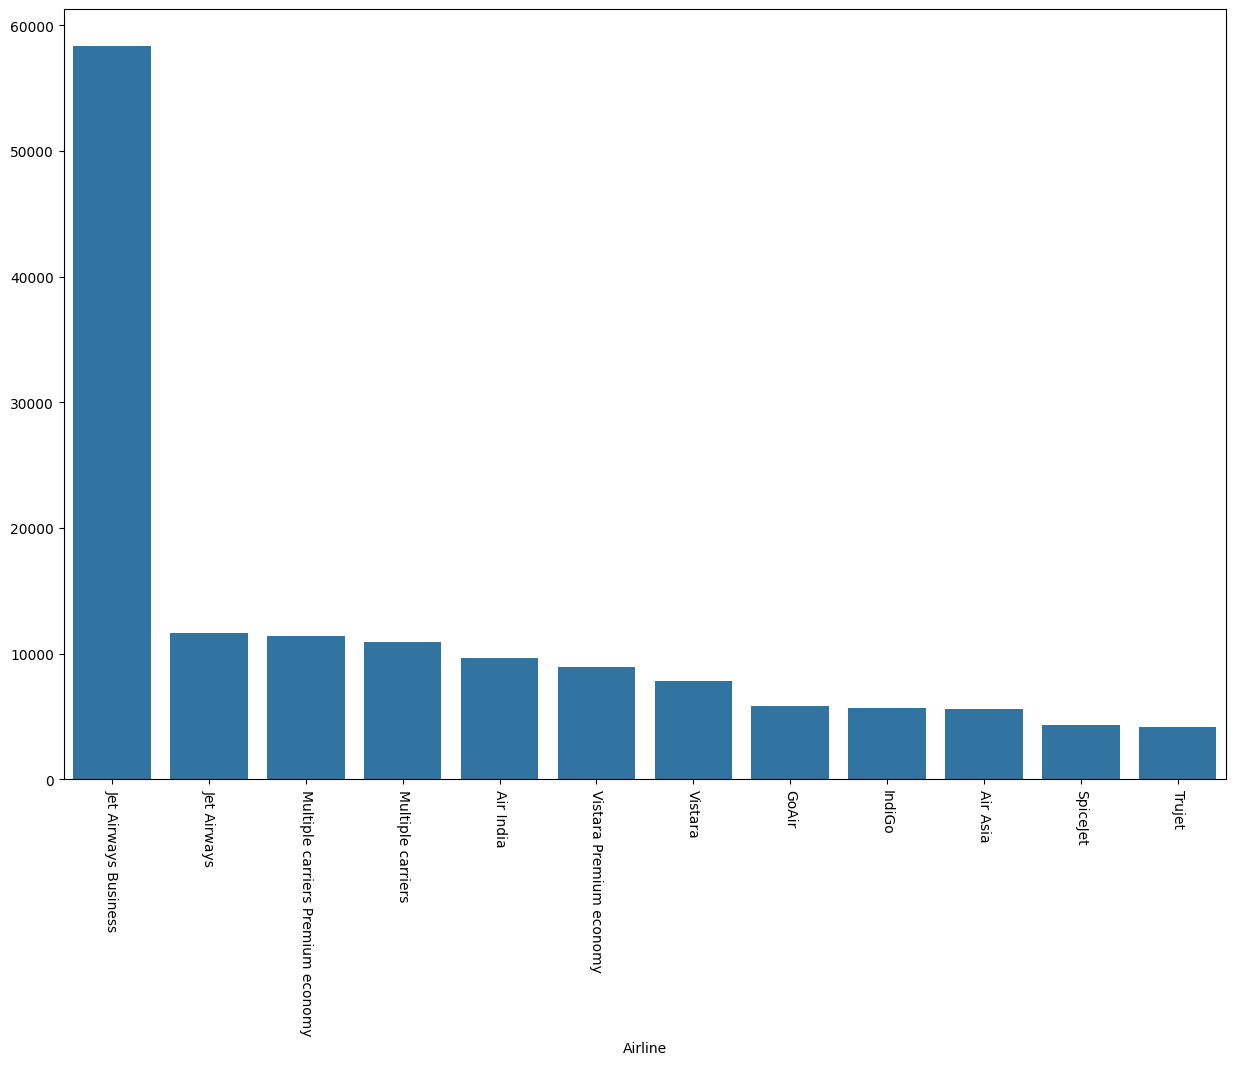

In [29]:
Airprice=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=Airprice.index,y=Airprice.values)
plt.xticks(rotation=270)
plt.show()

#### Box Plot Airline VS Price

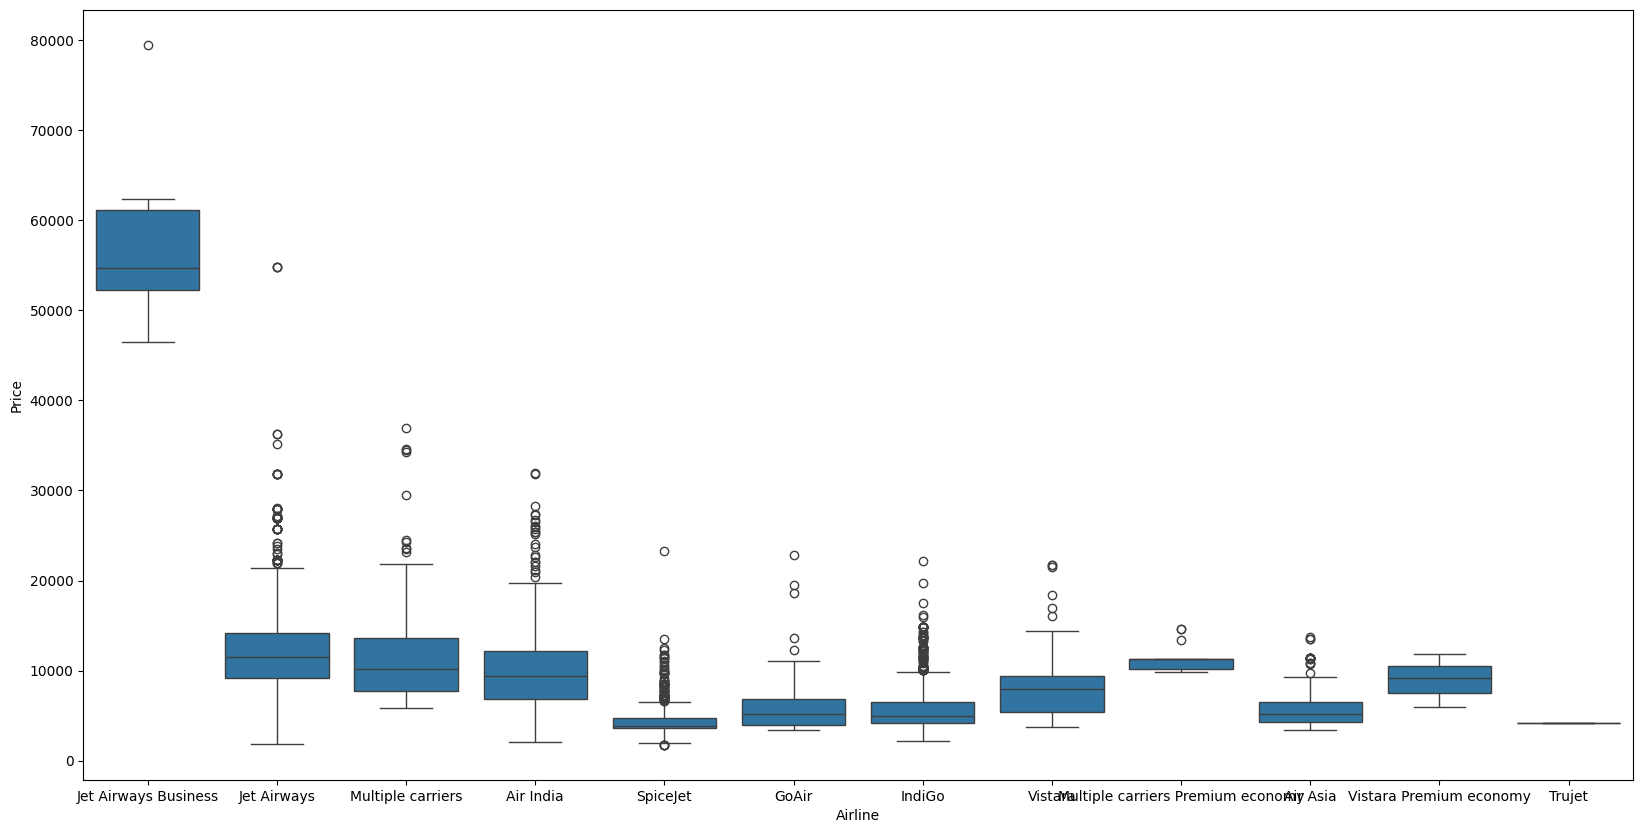

In [30]:
plt.figure(figsize=(20, 10))
sns.boxplot(y='Price', x='Airline', data=df.sort_values(by='Price', ascending=False))
plt.show()

#### Price based on number of stops

In [31]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

#### Bar Plot

##### Bar Plot - Same information from above as chart
##### One stop and two stop Jet Airways Business is having the highest price

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3989422228.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



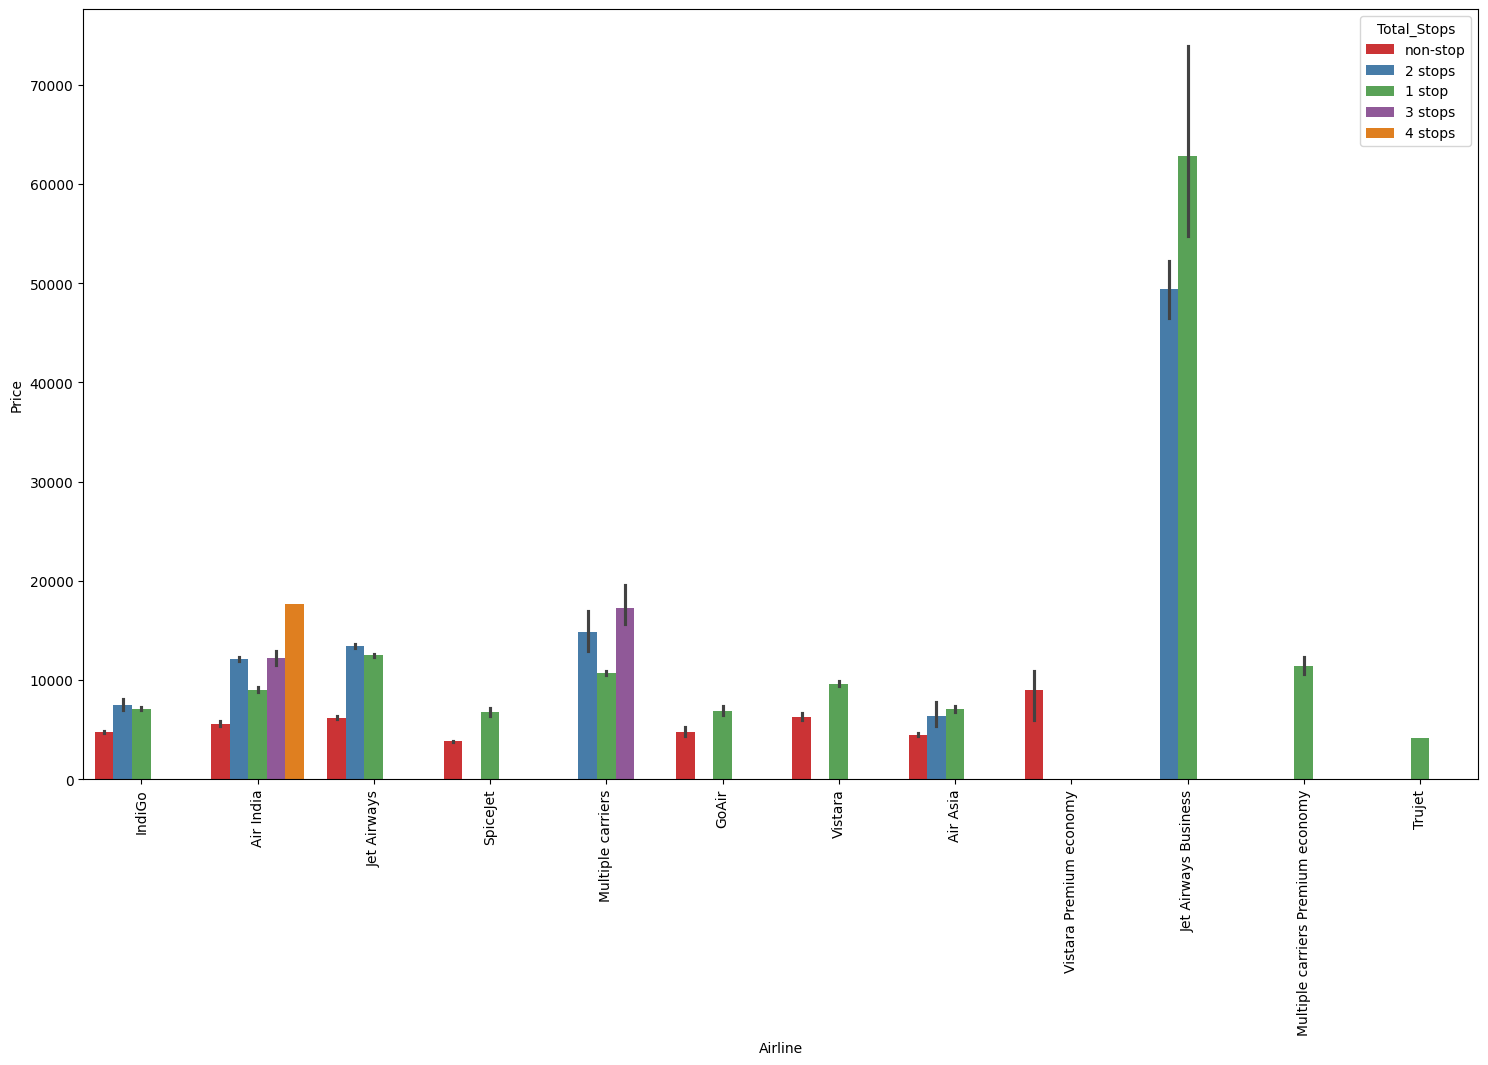

In [32]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Number of flights from different Airports

In [33]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

#### Source vs Price

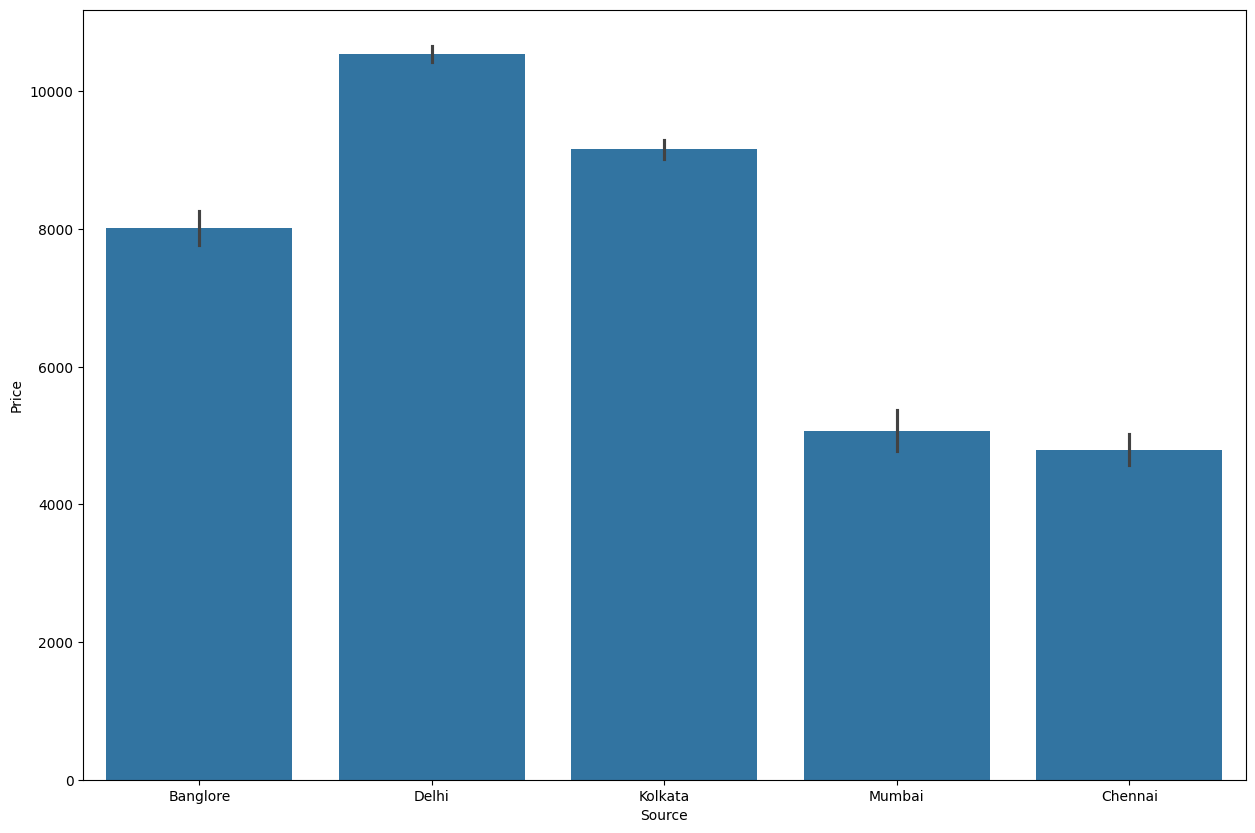

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

#### Flight in the destination

In [35]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

#### Destination vs Price

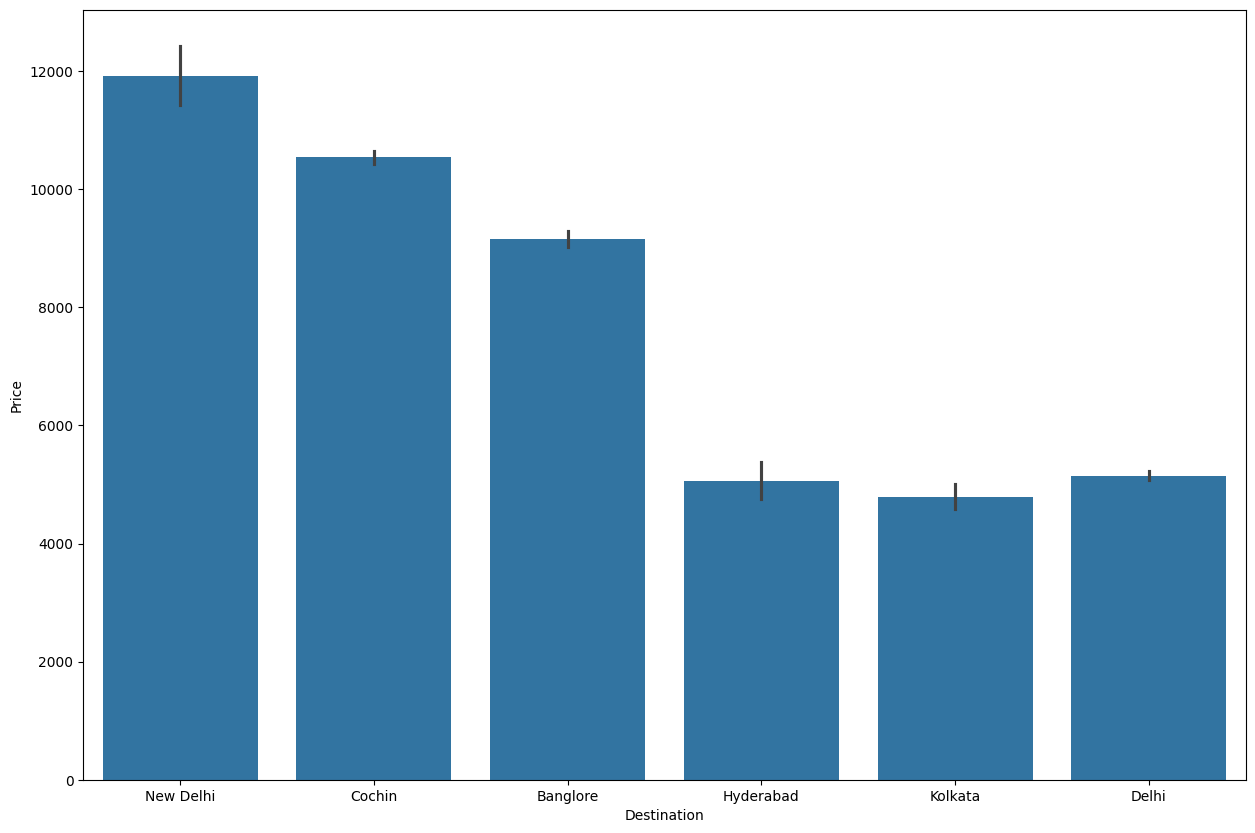

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

#### There is New Delhi and Delhi in the data set, replace New Delhi with Delhi 

In [37]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

#### Display Unique Destination

In [38]:
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

#### Flight in the destination after consolidation

In [39]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

#### Create Bar Plot again with Price

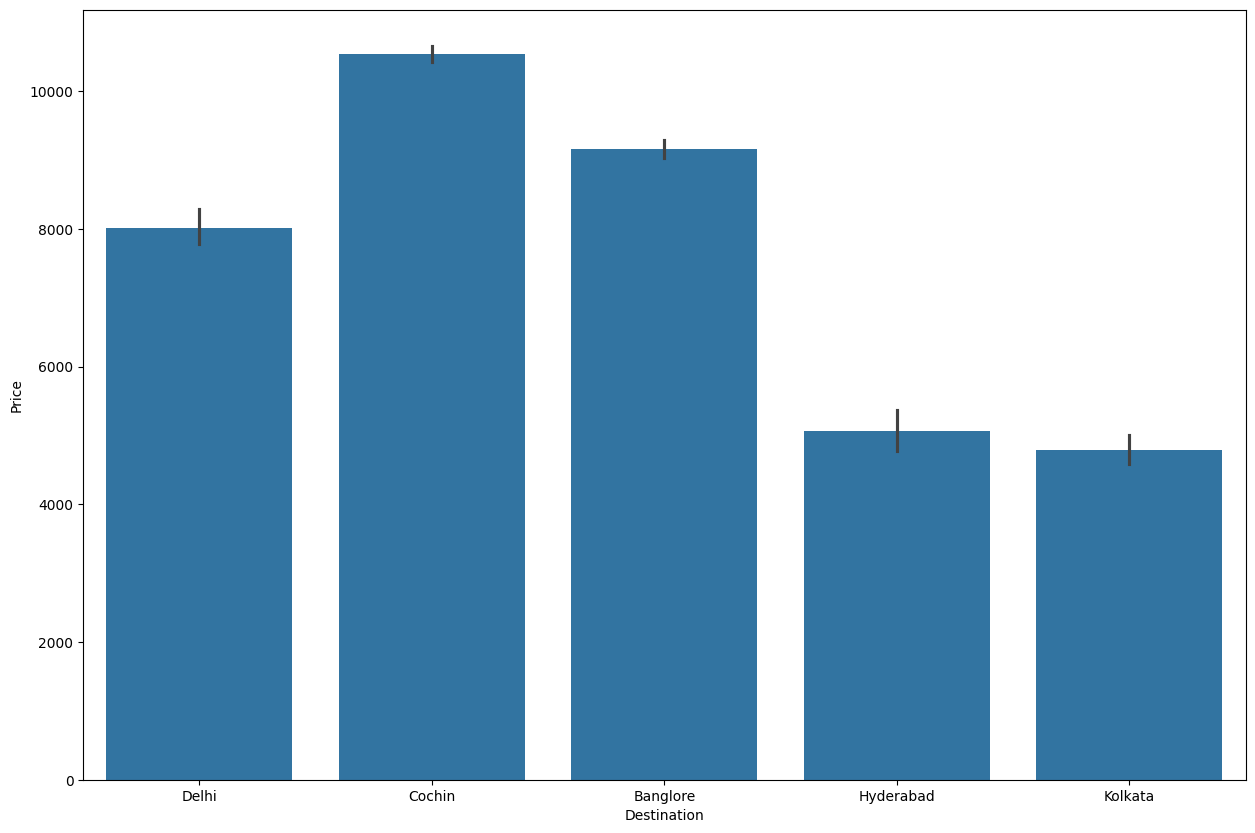

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

#### Create Heat Map- Co-relation Matrix

##### To create a correlation matrix/heatmap, all columns should be integer or float

#### Display the Data

In [41]:
display(df.head(2))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


#### Create a data frame after removing string columns and Y variable

In [42]:
df_corr=df.iloc[:,7:]
display(df_corr)

,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,24,3,22,20,1,10,2,50
1,1,5,5,50,13,15,7,25
2,9,6,9,25,4,25,19,00
3,12,5,18,5,23,30,5,25
4,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2,30
10679,27,4,20,45,23,20,2,35
10680,27,4,8,20,11,20,3,00
10681,1,3,11,30,14,10,2,40


###### The features are less correlated which is a good thing for us to avoid Multicollinearity

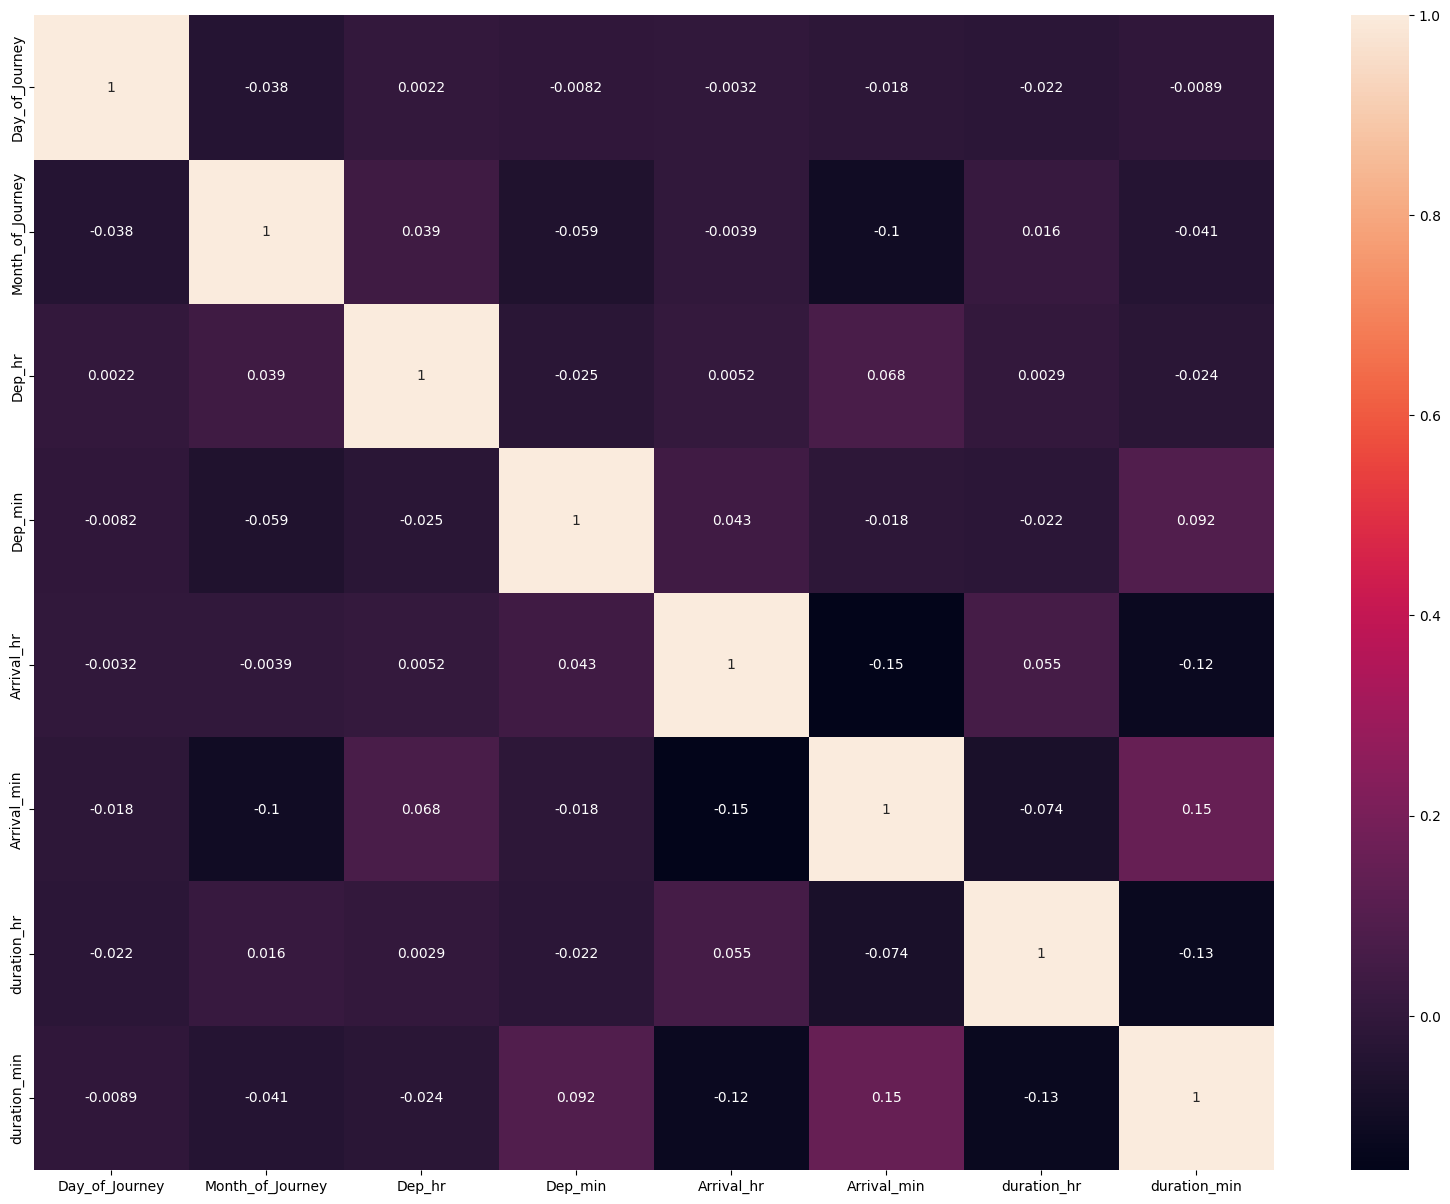

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr.corr(),annot=True)
plt.show()

# One Hot Encoding

#### Display Data Frame

In [44]:
display(df.head(4))

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


#### Label Encoding

##### Label Encoding - Columns 'Total_Stops'

In [45]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stop':3,'4 stop':4})
display(df.head())

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,0.0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,16,50,21,35,4,45


#### One Hot Encoding

##### One Hot Encoding -Column "Airline" - Due to drop_first, there is no column for Air Asia

In [46]:
air_dummy=pd.get_dummies(df['Airline'],drop_first=True,dtype=int)
display(air_dummy)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


#### One hot encoding for columns 'Source','Destination' Due to drop first Source Cochin column Dropped

In [47]:
source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True,dtype=int)
display(source_dest_dummy)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


#### Concatenate Label Encoded and one hot encoded columns into main data frame

In [48]:
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)
display(df.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25


#### Drop Columns
##### Drop Columns - Already Label Encoded or One Hot Encoded

In [49]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

#### Display - Shapes

In [50]:
display(df.shape)

(10682, 31)

# Modify Test Data

#### Read Test Data

In [51]:
df_test=pd.read_excel('Test_set.xlsx')
display(df_test)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


#### Perform all data manipulation steps in Test Data

##### Column - 'Date_of_Journey' - Extract Day and month

In [52]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y')
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month
# Dep_time
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute
# Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
# Splitting durationtime
a=df_test['Duration'].str.split('',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x:x[:-1])
# dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)
# Handling Categorical Vaues
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0,'2 stop':2,'1 stop':1,'3 stop':3,'4 stop':4})
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True,dtype=int)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True,dtype=int)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3077366047.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3077366047.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3077366047.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pmgho\AppData\Local\Temp\ipykernel_10812\3077366047.py:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

#### Drop additional Columns from Test Data

In [53]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route'],inplace=True,axis=1)
display(df_test.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_Kolkata,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1.0,6,6,17,30,4,25,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1.0,12,5,6,20,10,20,
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1.0,21,5,19,15,19,0,
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1.0,21,5,8,0,21,0,


#### Print Shape of Training and Test Data

In [54]:
print('train_shape',df.shape)

train_shape (10682, 31)


#### Additional columns in training data set 'Route','Price','Additional_Info',can be removed later

In [55]:
print('test_shape',df_test.shape)

test_shape (2671, 27)


#### Create X and Y from Training Data

In [56]:
x=df.drop(['Route','Price','Additional_Info'],axis=1)
y=df['Price']

#### Display X

In [72]:
display(x.head(3))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0.0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2.0,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2.0,9,6,9,25,4,25,19,00


In [73]:
display(y.head(3))

0     3897
1     7662
2    13882
Name: Price, dtype: int64

# Model Building

#### Create Model ExtraTreeRegressor with Full Data Set

In [85]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

# Assuming x and y are pandas DataFrames or Series
x = x.dropna()
y = y[x.index]  # Ensure y aligns with the remaining rows in x

ET_Model = ExtraTreesRegressor()
ET_Model.fit(x, y)

ExtraTreesRegressor()

#### Predict and Print Accuracy

In [86]:
y_predict=ET_Model.predict(x)
display(r2_score(y,y_predict))

0.963117697564064

#### Feature Importance Graph

In [93]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

<Axes: >

#### Train Test Split

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

#### Create Model Extra Tree Regression

In [92]:
from sklearn.ensemble import ExtraTreesRegressor 
ET_Model = ExtraTreesRegressor(n_estimators=120, random_state=42)
ET_Model.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=120, random_state=42)

In [94]:
y_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display(r2_score(y_test,y_predict))

0.7782741860168195

#### Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.8159795079657753

#### RandomizedSearchCV

###### Hyperparameter Tuning and RandomizedSearchCV - Model used - RandomForestRegressor

In [97]:
from sklearn.model_selection import RandomizedSearchCV  # Corrected import
from sklearn.ensemble import RandomForestRegressor
import numpy as np


n_estimators = [int(x) for x in np.linspace(start=80, stop=1500, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num=5)]
min_samples_split = [2, 5, 10, 15, 100]  # Corrected variable name
min_samples_leaf = [1, 2, 5, 10]  # Corrected variable name


rand_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,  # Corrected key
    'min_samples_leaf': min_samples_leaf  # Corrected key
}


rf = RandomForestRegressor()


rCV = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rand_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,
    cv=3,
    random_state=42,
    n_jobs=-1
)


#### Fit Model

In [98]:
rCV.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

#### Prediction

In [99]:
rf_pred=rCV.predict(X_test)
display(rf_pred)

array([11296.30408917,  9614.15518686, 10842.23574847, ...,
        4862.83567995, 13030.05032386, 12339.04683392])

#### Mean_absolute_error and mean_squared_error

In [101]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1256.57482552339
MSE 4174914.8016352816


##### Display Accuracy

In [102]:
display(r2_score(y_test,rf_pred))

0.7990942841139488

#### Model CatBoostRegressor

In [103]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057424
0:	learn: 4487.3553276	total: 144ms	remaining: 2m 24s
1:	learn: 4361.2133553	total: 148ms	remaining: 1m 13s
2:	learn: 4222.5263619	total: 151ms	remaining: 50.2s
3:	learn: 4094.2436663	total: 154ms	remaining: 38.3s
4:	learn: 3964.9458711	total: 156ms	remaining: 31.1s
5:	learn: 3857.8906704	total: 160ms	remaining: 26.5s
6:	learn: 3760.9961993	total: 163ms	remaining: 23.1s
7:	learn: 3684.5958724	total: 166ms	remaining: 20.6s
8:	learn: 3586.8332661	total: 169ms	remaining: 18.6s
9:	learn: 3497.8084062	total: 172ms	remaining: 17s
10:	learn: 3409.8639721	total: 178ms	remaining: 16s
11:	learn: 3343.3343282	total: 181ms	remaining: 14.9s
12:	learn: 3283.8520097	total: 184ms	remaining: 14s
13:	learn: 3212.2293568	total: 188ms	remaining: 13.2s
14:	learn: 3145.0547878	total: 190ms	remaining: 12.5s
15:	learn: 3090.7503211	total: 194ms	remaining: 11.9s
16:	learn: 3048.4169387	total: 198ms	remaining: 11.4s
17:	learn: 3008.2590834	total: 201ms	remaining: 10.9s
18:	learn: 2

#### Cat Boost Prediction

In [104]:
cat_pred=cat.predict(X_test)
display(cat_pred)

array([ 8883.180585  ,  9481.90991559, 11695.7422253 , ...,
        5043.94249358, 12938.15347761, 11619.09638587])

#### Cat Boost Accuracy

In [105]:
display(r2_score(y_test,cat_pred))

0.8406009258444691

#### Install Light GBM

In [ ]:
# pip intall lightgbm

#### Change Data type for Light GBM

###### Change the data type for Light GBM Regressor - Convert to Integer

In [106]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

#### Create Model Light GBM Regressor

In [107]:
from lightgbm import LGBMRegressor
lgb_model=LGBMRegressor()
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 174
[LightGBM] [Info] Number of data points in the train set: 8508, number of used features: 24
[LightGBM] [Info] Start training from score 9067.735073


LGBMRegressor()

#### Prediction and display accuracy

In [108]:
lgb_pred=lgb_model.predict(X_test)
display(r2_score(y_test,lgb_pred))

0.8187155239549471

#### Create Model XG Boost Regressor

In [115]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display(r2_score(y_test,xgb_pred))

0.8433172702789307

#### Dsiplay top 5 records

In [116]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


##### Create Pickle File

##### Use pickle to save our model so that we can use it later

In [118]:
import pickle
# Saving model to disk
pickle.dump(cat,open('prajwalmodel.pkl','wb'))
model=pickle.load(open('prajwalmodel.pkl','rb'))

#### Display column names

In [120]:
display(df.columns)

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

#### Data Set for Deployment

###### Create the data set for deployment by removing columns Route and Additional_Info

In [121]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)
deploy_df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0.0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2.0,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2.0,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1.0,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1.0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0.0,4107,9,4,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0.0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0.0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0.0,12648,1,3,11,30,14,10,2,40


#### Generate the .csv file and display the data set

In [122]:
deploy_df.to_csv('prajwaldeploy_df.csv')
display(deploy_df)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0.0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2.0,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2.0,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1.0,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1.0,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0.0,4107,9,4,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0.0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0.0,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,0.0,12648,1,3,11,30,14,10,2,40


###### By Prajwal Ghotkar